<h4>Our task today is to generalise regression with a likelihood function.
<br>
Likelihood function of a distribution function f is given by 
<br><br>
$L(\beta | X) = f(X | \beta) = \Pi_{i} f(X_{i} ; \beta)$
<br>
    <br>
Generally, our task is to maximize the Likelihood Function to find the optimal $\beta$ for the given X, because basically, maximum likelihood happens when f is highest, which is the probability density of X at that $\beta$.
<br>
    <br>
Here, it can sometimes be easier to find evaluate the maxima of the log of the likelihood function, which we can do, because, log is an increasing function, so maxima for both will be at same point.
</h4>

<h4> Let's take a multiple regression example.
<br>
    <br>
In this, we have $Y_{i} = \beta^T X_{i} + \epsilon_{i}$
<br>
Here, we assume $\epsilon_{i} \overset{\text{iid}}{\sim} N(0, \sigma^2)$
<br>
So, $Y_{i} \overset{\text{}}{\sim} N(\beta^T X_{i}, \sigma^2)$
<br>
$L = \frac{1}{(2\pi \sigma^2)^\frac{N}{2}} e^{-\frac{\sum_{i} (Y_{i} - \beta^T X_{i})^2}{2 \sigma^2}}$
<br>
$log L = -\frac{N}{2} log (2\pi \sigma^2) - \frac{\sum_{i} (Y_{i} - \beta^T X_{i})^2}{2 \sigma^2}$
<br>
    <br>
To maximize this, we need to minimize
<br>
    <br>
$l(\beta) = \sum_{i} (Y_{i} - \beta^T X_{i})^2$
<br>
This is the loss function, now.</h4>

<h4>
Take X as the matrix with ith row as $X_{i}^T$
<br>
    <br>
$\frac{\partial l}{\partial \beta} = \sum_{i} -2(Y_{i} - X_{i}^T \beta)X_{i} = 0$
<br>
    <br>
$\sum_{i} Y_{i}X_{i} = \sum_{i} X_{i}^T \beta X_{i}$
<br>
<br>
$X^T Y = X^T X \beta$
<br>
<br>
$\beta = (X^T X)^{-1} X^T Y$

<h4>We can try to implement it to see if it actually works. We'll use the iris dataset we used before.</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
X = np.array(df["PetalWidthCm"])
Y = np.array(df["PetalLengthCm"])
N = len(X)

In [4]:
m1 = (N*sum(X*Y) - sum(X) * sum(Y))/(N * sum(X**2) - (sum(X))**2)
c1 = (sum(Y) * sum(X**2) - sum(X) * sum(X*Y))/(N * sum(X**2) - (sum(X))**2)
print(m1)
print(c1)

2.225885306553904
1.0905721458773867


In [5]:
np.ones(N)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
X_new = np.array([np.ones(N), X]).T
Y_new = np.array([Y]).T

In [7]:
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X_new.T, X_new)), X_new.T), Y_new)
m2 = Beta[1][0]
c2 = Beta[0][0]
print(m2)
print(c2)

2.2258853065539093
1.0905721458773785


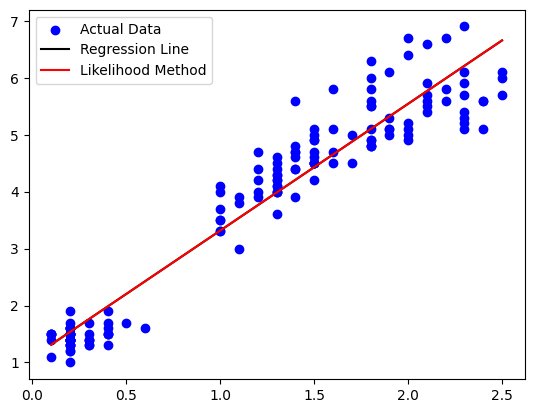

In [8]:
plt.scatter(X, Y, color = "blue")
X_1 = np.min(X)
Y_1 = m1 * X_1 + c1
Y_1_L = m2 * X_1 + c2
X_2 = np.max(X)
Y_2 = m1 * X_2 + c1
Y_2_L = m2 * X_2 + c2
plt.plot([X_1, X_2], [Y_1, Y_2], color = "black")
plt.plot([X_1, X_2], [Y_1_L, Y_2_L], color = "red")
plt.legend(["Actual Data", "Regression Line", "Likelihood Method"])
#plt.title("Y " + r'$\approx$ '  + str(round(m, 2)) + " X + " + str(round(c, 2)))
plt.show()

In [9]:
Y_pred = np.dot(X_new, Beta)
Y_pred = Y_pred.T[0]
r2_score(Y, Y_pred)

0.9269012279220037

In [10]:
np.corrcoef(Y, Y_pred)

array([[1.       , 0.9627571],
       [0.9627571, 1.       ]])

In [11]:
df = pd.read_csv("Real estate Multiple Regression.csv")

In [12]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
N = len(df)

In [14]:
X = np.array(df.iloc[:,1:7])
X = np.append(np.array([np.ones(N)]).T, X, axis = 1)
X

array([[1.0000000e+00, 2.0129170e+03, 3.2000000e+01, ..., 1.0000000e+01,
        2.4982980e+01, 1.2154024e+02],
       [1.0000000e+00, 2.0129170e+03, 1.9500000e+01, ..., 9.0000000e+00,
        2.4980340e+01, 1.2153951e+02],
       [1.0000000e+00, 2.0135830e+03, 1.3300000e+01, ..., 5.0000000e+00,
        2.4987460e+01, 1.2154391e+02],
       ...,
       [1.0000000e+00, 2.0132500e+03, 1.8800000e+01, ..., 7.0000000e+00,
        2.4979230e+01, 1.2153986e+02],
       [1.0000000e+00, 2.0130000e+03, 8.1000000e+00, ..., 5.0000000e+00,
        2.4966740e+01, 1.2154067e+02],
       [1.0000000e+00, 2.0135000e+03, 6.5000000e+00, ..., 9.0000000e+00,
        2.4974330e+01, 1.2154310e+02]])

In [15]:
Y = np.array([df.iloc[:,7]]).T
Y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [16]:
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
Beta

array([[-1.44371025e+04],
       [ 5.14622771e+00],
       [-2.69695447e-01],
       [-4.48746098e-03],
       [ 1.13327691e+00],
       [ 2.25472975e+02],
       [-1.24235912e+01]])

In [17]:
Y_pred = np.dot(X, Beta)
Y_pred = Y_pred.T[0]
Y_pred

array([47.16894077, 47.82573616, 48.79677999, 48.36964309, 46.13886655,
       31.13584736, 38.61587545, 46.85211419,  9.16604065, 34.77291104,
       33.57234952, 53.09676724, 40.81426394, 26.94176081, 45.60486574,
       38.10926108, 50.74281682, 37.18549873, 46.73342479, 47.53381708,
       35.27726819, 49.46841839, 28.83474073, 47.85745652, 34.85705823,
       31.97023626, 46.14266857, 42.09675423, 42.74715554, 45.6877337 ,
       13.30333562, 40.52338067, 30.63871356, 46.39596749, 47.09156308,
       33.19408499, 30.47381584, 30.84947537, 44.37063016, 45.87840612,
       14.39995827, 16.50429607, 36.5591154 , 40.18913738, 47.67033707,
       39.75218541, 46.77260279, 37.49833905, 12.62944107,  9.47655213,
       41.79896802, 23.81663517, 34.86234882, 41.58762911, 45.47309253,
       23.27524618, 43.40062473, 45.86320076, 13.52063391, 40.65937349,
       34.01289978, 50.3838791 , 29.69016993, 47.69730661, 33.19569272,
       43.58378887, 47.0337228 , 47.08418591, 43.21229544, 45.15

In [18]:
Y = Y.T[0]

In [19]:
r2_score(Y, Y_pred)

0.5823704472722854

In [20]:
np.corrcoef(Y, Y_pred)

array([[1.      , 0.763132],
       [0.763132, 1.      ]])

<h4> Challenge : Try to get a solution for Logistical Regression.
<br>
<br>
For Logistical Regression,
<br>
<br>
$Y_{i} \overset{\text{}}{\sim} Bern(\frac{e^{X_{i}^T \beta}}{1 + e^{X_{i}^T \beta}})$
<br>
<br>
$Distribution \ function \ f(y) \ for \ Bern(p) = p^{y} (1 - p)^{1 - y}$
<br>
<br>
Try to get the likelihood function. Here, log likelihood would be easier.</h4>